In [1]:
import cv2
import dlib
import face_recognition
from matplotlib import pyplot as plt

In [2]:
def detect_face(img, mode='cv'):

    if mode == "dlib":
        
        detector = dlib.get_frontal_face_detector()
        faces = detector(img, 1)
        
    elif mode == "cv":
        
        detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = detector.detectMultiScale(img, scaleFactor=1.5, minNeighbors=5, minSize=(100, 100))
    
    return faces


def draw_rectangle(img, faces, mode='cv'):
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 5.0
    font_color = (0, 255, 0)  # Green color in BGR format
    thickness = 10
    
    if mode == "dlib":
        for i, face in enumerate(faces):
            x1, y1 = face.tl_corner().x, face.tl_corner().y
            x2, y2 = face.br_corner().x, face.br_corner().y
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 10)
            cv2.putText(img, str(i+1), (x1, y1), font, font_scale, font_color, thickness)

    elif mode == 'cv':
        for i, (x, y, w, h) in enumerate(faces):
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 10)
            cv2.putText(img, str(i+1), (x, y), font, font_scale, font_color, thickness)
    
    return img


def convert_opencv_to_dlib(bbox_opencv):
    
    x, y, width, height = bbox_opencv

    left = x
    top = y
    right = x + width
    bottom = y + height

    left = max(left, 0)
    top = max(top, 0)
    right = right
    bottom = bottom

    bbox_dlib = (left, top, right, bottom)

    return bbox_dlib


def embeddings(img, faces, mode='cv'):
    
    known_faces = []
    
    if mode == "cv":
        for face in faces:
            known_faces.append(convert_opencv_to_dlib(face))
            
    elif mode == "dlib":
        for face in faces:
            known_faces.append((face.tl_corner().x, face.tl_corner().y, face.br_corner().x, face.br_corner().y))
        
    vectors = face_recognition.face_encodings(img, known_face_locations=known_faces, num_jitters=100, model='large')
    
    return vectors


def calculate_embeddings(filename, mode='cv'):
    
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    faces = detect_face(img, mode=mode)
    print("Number of Faces detected:", len(faces))
    img_draw = draw_rectangle(img, faces, mode=mode)
    
    emb = embeddings(img, faces, mode=mode)
    
    return img_draw, emb

In [3]:
img, emb = calculate_embeddings("data/DSC0690.jpg", mode='dlib')

Number of Faces detected: 1


In [4]:
img1, emb1 = calculate_embeddings("data/DSC_0475.jpg", mode='dlib')

Number of Faces detected: 7


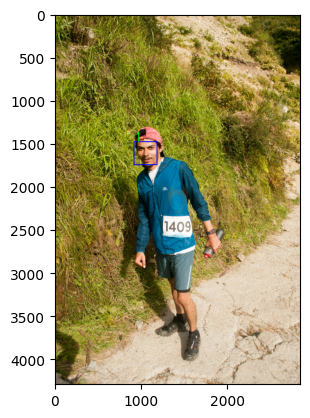

In [5]:
plt.imshow(img)

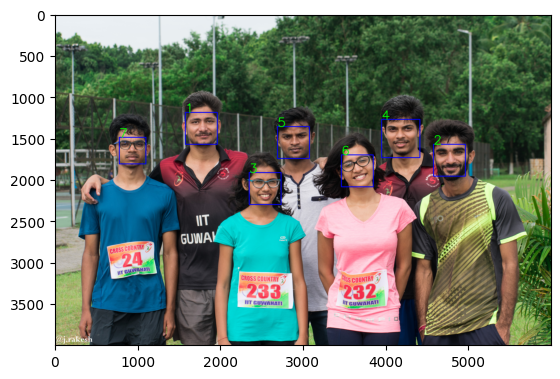

In [ ]:
plt.imshow(img1)

In [10]:
face_recognition.compare_faces(emb1, emb[0], tolerance=0.32)

[False, True, False, True, False, False, False]

In [34]:
import numpy as np
np.linalg.norm(emb[0]-emb1[6])

0.44280279186628874

In [23]:
emb1[3]

array([-3.99176590e-02,  1.04916558e-01,  9.08227637e-02, -8.84724036e-03,
       -7.96069801e-02, -4.25219387e-02, -5.36882132e-02,  1.44526552e-04,
        1.27231672e-01, -3.24757807e-02,  2.32100785e-01, -1.46977874e-02,
       -2.44695678e-01, -2.86512207e-02, -3.50756454e-03,  9.97724310e-02,
       -1.42348275e-01, -6.62799254e-02, -1.05659194e-01, -1.17935114e-01,
        4.42959853e-02,  1.10015972e-02,  1.31568927e-02,  5.96406078e-03,
       -9.54173952e-02, -2.94010282e-01, -7.90115520e-02, -1.24613114e-01,
        9.03142318e-02, -1.82792455e-01,  1.03952419e-02,  2.96399537e-02,
       -1.19683027e-01, -3.76310237e-02, -1.84991434e-02,  2.24112067e-02,
        6.10535732e-03, -9.95675102e-02,  1.52938634e-01, -3.48062329e-02,
       -1.51467115e-01, -5.67450933e-02,  2.84640957e-03,  2.55620480e-01,
        1.80223629e-01,  4.06768247e-02,  1.90545563e-02, -5.35324290e-02,
        5.95808364e-02, -2.80593336e-01,  2.75827255e-02,  1.55837059e-01,
        1.87346842e-02,  

In [33]:
face_recognition.face_distance(emb[0], emb1)

array([0.35688167, 0.31036251, 0.37319621, 0.31036251, 0.41554161,
       0.46890957, 0.44280279])

In [35]:
help(face_recognition.face_distance)

Help on function face_distance in module face_recognition.api:

face_distance(face_encodings, face_to_compare)
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.
    
    :param faces: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array

